In [1]:
%matplotlib inline

In [2]:
# Learning about Ridge Regression
# Ridge Regression introduces a regularization parameter to
# "shrink" coefficients.
# Useful when the dataset has collinear factors (when the points
# lie in a line or in a row)

In [3]:
# For this example we need a dataset with a low effective rank
# From linear algebra, the rank of a matrix is the number of
# independent rows or columns.
# Important Fact: Linear Regression assumes full rank (meaning 
# all the rows are linearly independent)

In [28]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
reg_data, reg_target = make_regression(n_samples = 2000, n_features = 3, effective_rank=2, noise=10)

In [29]:
import numpy as np
n_bootstraps = 1000
len_data = len(reg_data)
lr = LinearRegression()

In [30]:
subsample_size = np.int(0.75 * len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

In [31]:
coefs = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    lr.fit(subsample_X, subsample_y)
    coefs[i][0] = lr.coef_[0]
    coefs[i][1] = lr.coef_[1]
    coefs[i][2] = lr.coef_[2]

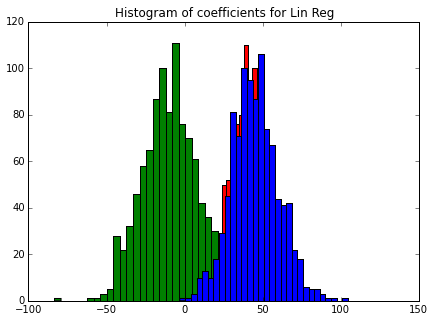

In [32]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
ax.hist([c[0] for c in coefs], color='r', bins=30)
ax = f.add_subplot(111)
ax.hist([c[1] for c in coefs], color='g', bins=30)
ax = f.add_subplot(111)
ax.hist([c[2] for c in coefs], color='b', bins=30)
ax.set_title("Histogram of coefficients for Lin Reg")

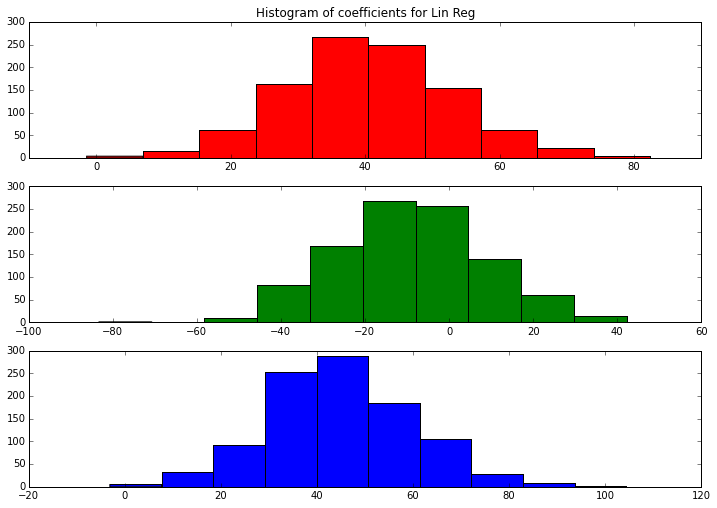

In [33]:
f, ax = plt.subplots(figsize=(10,7), nrows=3)
f.tight_layout()
ax[0].hist([c[0] for c in coefs], color='r', bins=10)
ax[1].hist([c[1] for c in coefs], color='g', bins=10)
ax[2].hist([c[2] for c in coefs], color='b', bins=10)
ax[0].set_title("Histogram of coefficients for Lin Reg")

In [34]:
from sklearn.linear_model import Ridge

In [35]:
r = Ridge()

In [36]:
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.75 * len_data)

In [37]:
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

In [38]:
coefs_r = np.ones((n_bootstraps, 3))

In [39]:
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    r.fit(subsample_X, subsample_y)
    coefs_r[i][0] = r.coef_[0]
    coefs_r[i][1] = r.coef_[1]
    coefs_r[i][2] = r.coef_[2]



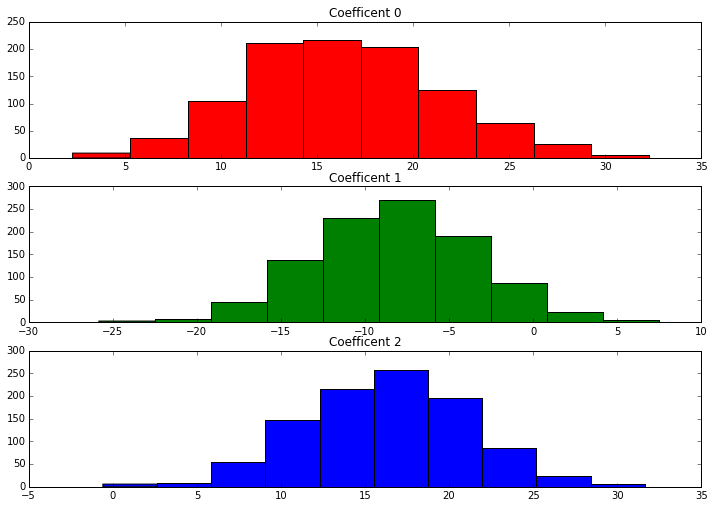

In [40]:
f, ax = plt.subplots(figsize=(10,7), nrows=3)
f.tight_layout()
ax[0].hist([c[0] for c in coefs_r], color='r', bins=10)
ax[1].hist([c[1] for c in coefs_r], color='g', bins=10)
ax[2].hist([c[2] for c in coefs_r], color='b', bins=10)
ax[0].set_title("Coefficent 0")
ax[1].set_title("Coefficent 1")
ax[2].set_title("Coefficent 2")

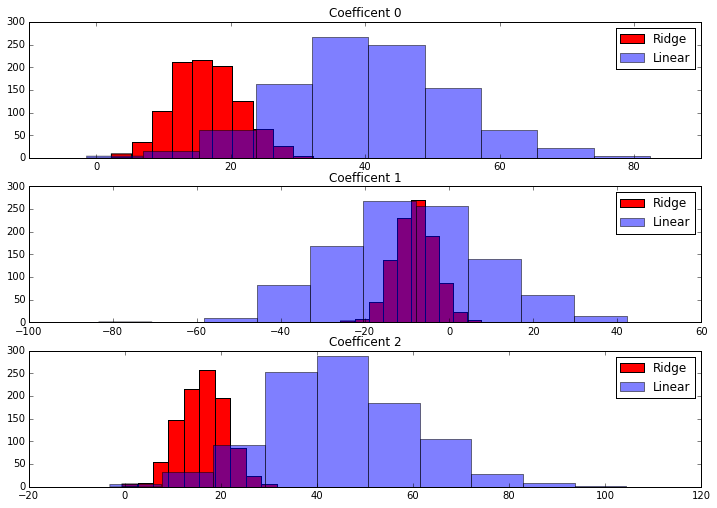

In [46]:
f, ax = plt.subplots(figsize=(10,7), nrows=3)
f.tight_layout()
ax[0].hist([c[0] for c in coefs_r], color='r', bins=10, label='Ridge')
ax[1].hist([c[1] for c in coefs_r], color='r', bins=10, label='Ridge')
ax[2].hist([c[2] for c in coefs_r], color='r', bins=10, label='Ridge')

ax[0].hist([c[0] for c in coefs], color='b', alpha=.5, bins=10, label='Linear')
ax[1].hist([c[1] for c in coefs], color='b', alpha=.5, bins=10, label='Linear')
ax[2].hist([c[2] for c in coefs], color='b', alpha=.5, bins=10, label='Linear')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[2].legend(loc='best')
ax[0].set_title("Coefficent 0")
ax[1].set_title("Coefficent 1")
ax[2].set_title("Coefficent 2")